# PCA

In [116]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

Make the PCA of the factors in Multi-asset PCA CHANGES=4w.csv

In [115]:

# Load the data
df = pd.read_csv('Copie de Multi-asset PCA_CHANGES=4w.csv',index_col=0)

# Perform PCA
pca = PCA(n_components=6)
pca.fit(df)

PCA(n_components=6)

In [109]:
format_colour = lambda x: 'color:red' if x < 0. else 'color:lightgreen'

Make the PCA of the factors in Multi-asset PCA CHANGES=4w.csv

In [110]:
# Display the loadings of the first 6 components
loadings = pd.DataFrame(pca.components_, columns=df.columns)
loadings.T.style.format(formatter='{:+.4f}').applymap(func=format_colour)


,0,1,2,3,4,5
MSCI World,-0.0003,+0.0004,+0.0000,+0.0014,+0.0010,-0.0021
S&P 500,-0.0002,+0.0003,-0.0001,+0.0014,+0.0010,-0.0020
Euro Stoxx 50,-0.0004,+0.0006,-0.0002,+0.0013,+0.0009,-0.0019
Euro Stoxx Banks,-0.0008,+0.0012,+0.0001,+0.0017,+0.0013,-0.0012
CDX.IG 5Y,-0.0000,+0.0000,-0.0000,+0.0002,+0.0001,-0.0001
CDX.HY 5Y,-0.0001,+0.0002,-0.0001,+0.0007,+0.0005,-0.0008
iTraxx Europe 5Y,-0.0000,+0.0001,-0.0000,+0.0001,+0.0001,-0.0002
iTraxx Crossover 5Y,-0.0002,+0.0002,-0.0002,+0.0005,+0.0004,-0.0011
Italy - Germany 10Y,+0.1471,-0.9737,+0.1298,+0.0005,+0.1103,-0.0027
US 2Y,-0.3677,-0.1534,-0.2680,+0.4021,-0.5172,+0.2562


Display the fraction of the variance explained by each PCA (sorted by the explained variance)
and the cumsum

In [111]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each PCA:\n", explained_variance)

Explained variance by each PCA:
 [0.57704449 0.19077077 0.08571986 0.07638219 0.02773655 0.01318607]


In [112]:
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_explained_variance)

Cumulative explained variance:
 [0.57704449 0.76781527 0.85353512 0.92991731 0.95765386 0.97083993]


How many components are needed to explain 75% of the variance?

In [113]:
components_75 = np.where(cumulative_explained_variance >= 0.75)[0][0] + 1
components_80 = np.where(cumulative_explained_variance >= 0.80)[0][0] + 1
print(f"{components_75} components are needed to explain 75% of the variance.")
print(f"{components_80} components are needed to explain 80% of the variance.")

2 components are needed to explain 75% of the variance.
3 components are needed to explain 80% of the variance.


Display the cumsum of the returns of the 3 main components

In [114]:
returns = pd.DataFrame(pca.transform(df), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Cumulative returns of the 3 main components:\n", returns.iloc[:, :3].cumsum())

Cumulative returns of the 3 main components:
               PC1           PC2           PC3
0    2.734555e+01 -3.127345e+00 -1.460563e+01
1    1.466822e+01 -4.535394e+00 -6.978215e+00
2   -2.978135e+01 -9.045916e+00 -1.552186e+01
3    2.063356e+01 -2.392515e+00 -1.145010e+01
4   -2.389769e+01 -1.034892e+01 -2.206307e+01
..            ...           ...           ...
227  1.852802e+01 -2.450660e+01 -8.930881e+01
228 -6.568860e+01 -4.553614e+01 -3.081954e+01
229  1.187422e+01  1.408420e+00 -3.019980e+01
230 -1.005365e+02 -3.243698e+01 -3.079536e+01
231 -3.979039e-13 -5.684342e-14 -6.750156e-14

[232 rows x 3 columns]


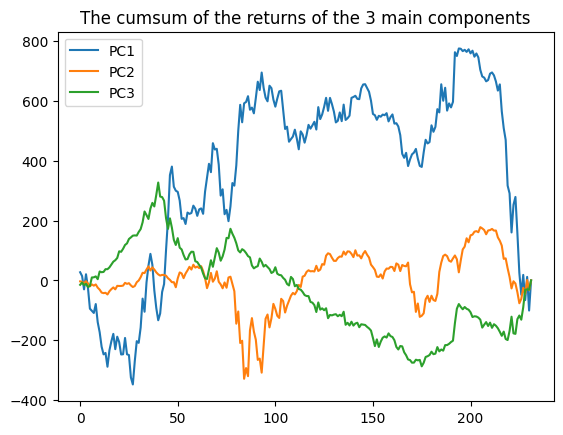

In [118]:
plt.plot(returns.iloc[:, :3].cumsum())
leg = ['PC1','PC2','PC3']
plt.legend(leg,loc='best')
plt.title('The cumsum of the returns of the 3 main components')
plt.show()

Regress each factors to each of the first 6 components and display the DataFrame:<br>
– Index: the factors<br>
– Columns: the 6 main components<br>
– Content: the r2of the regression of the factors vs the components<br>


In [128]:
r2_df = pd.DataFrame(index=df.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
for factor in df.columns:
    for pc in r2_df.columns:
        model = LinearRegression().fit(returns[[pc]], df[factor])
        predictions = model.predict(returns[[pc]])
        r2_df.loc[factor, pc] = r2_score(df[factor], predictions)

r2_df = r2_df.apply(pd.to_numeric, errors='coerce')

r2_df

,PC1,PC2,PC3,PC4,PC5,PC6
MSCI World,0.056046,0.045939,0.000105,2.139170e-01,0.039604,8.460035e-02
S&P 500,0.046860,0.027374,0.002734,2.281505e-01,0.042393,8.128986e-02
Euro Stoxx 50,0.102218,0.080996,0.003558,1.669748e-01,0.030645,6.324013e-02
Euro Stoxx Banks,0.182021,0.128163,0.000737,9.853194e-02,0.022030,9.011238e-03
CDX.IG 5Y,0.100740,0.055002,0.007378,2.146718e-01,0.037496,1.091184e-02
CDX.HY 5Y,0.070780,0.034596,0.007690,2.165095e-01,0.042550,5.084193e-02
iTraxx Europe 5Y,0.141562,0.139580,0.012040,1.337571e-01,0.033625,3.286493e-02
iTraxx Crossover 5Y,0.117502,0.065357,0.017178,1.388474e-01,0.030370,1.152576e-01
Italy - Germany 10Y,0.063964,0.926860,0.007403,1.110365e-07,0.001729,4.967325e-07
US 2Y,0.702659,0.040421,0.055428,1.111943e-01,0.066825,7.793841e-03


In [129]:
best_factor = []
for i in range(3):
    pc = f'PC{i+1}'
    best_factor.append(r2_df[pc].idxmax())
    print(f"The factor best explained by {pc} is {best_factor[i]}.")

The factor best explained by PC1 is US 5Y.
The factor best explained by PC2 is Italy - Germany 10Y.
The factor best explained by PC3 is Germany 2Y.


– What is the factor the best explained by PC1? Display the cumsum of that factor and
of PC1

Cumulative sum of US 5Y and the PC1:



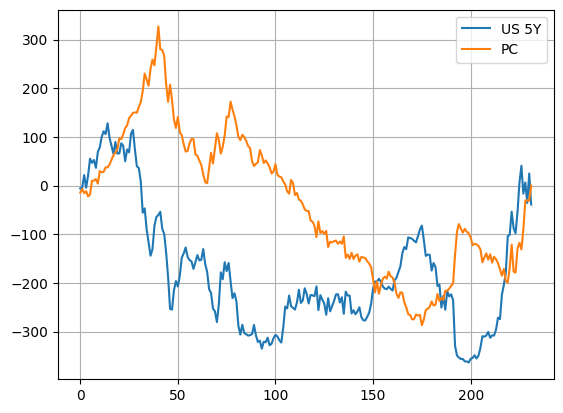

In [147]:
print(f"Cumulative sum of {best_factor[0]} and the PC1:\n")
df_pc1=pd.DataFrame({f'{best_factor[0]}': df[best_factor[0]].cumsum().reset_index(drop=True), 'PC': returns[pc].cumsum()})
df_pc1.plot()
plt.grid(True)

What is the factor the best explained by PC2? Display the cumsum of that factor and
of PC2

Cumulative sum of Italy - Germany 10Y and the PC2:



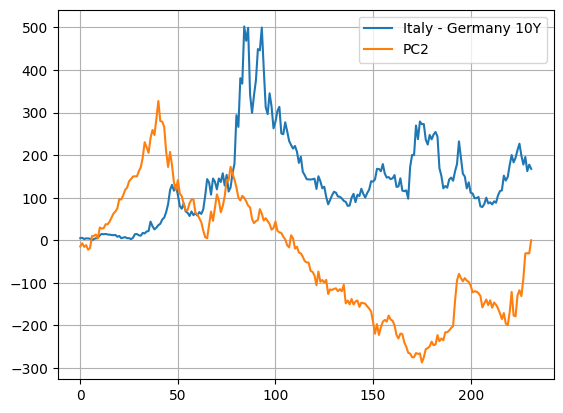

In [145]:
print(f"Cumulative sum of {best_factor[1]} and the PC2:\n")
df_pc2=pd.DataFrame({f'{best_factor[1]}': df[best_factor[1]].cumsum().reset_index(drop=True), 'PC2': returns[pc].cumsum()})
df_pc2.plot()
plt.grid(True)

What is the factor the best explained by PC3? Display the cumsum of that factor and
of PC3

Cumulative sum of Germany 2Y and the PC3:



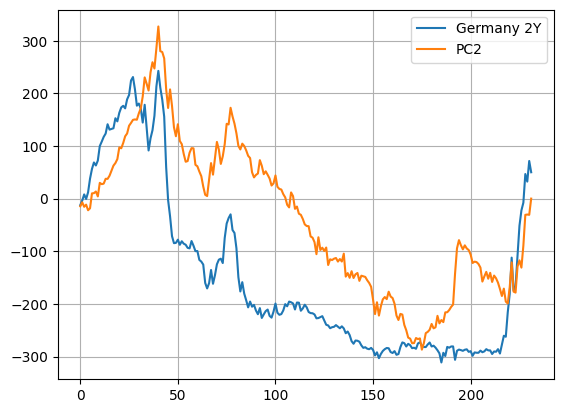

In [148]:
print(f"Cumulative sum of {best_factor[2]} and the PC3:\n")
df_pc2=pd.DataFrame({f'{best_factor[2]}': df[best_factor[2]].cumsum().reset_index(drop=True), 'PC2': returns[pc].cumsum()})
df_pc2.plot()
plt.grid(True)

# Study of the Traditional Assets

load the Traditional Assets Multi-asset PCA CHANGES=4w.csv file

In [157]:
# Load the data
TAM_4w = pd.read_csv('Copie de Traditional Assets_Multi-asset PCA_CHANGES=4w.csv',index_col=0)

# Perform PCA
pca_TAM = PCA(n_components=2)
pca_TAM.fit(TAM_4w)

PCA(n_components=2)

Compute the correlation of each assets with PC1 and PC2

In [160]:
# Compute the correlation of each asset with PC1 and PC2
returns = pd.DataFrame(pca_TAM.transform(TAM_4w), columns=[f'PC{i+1}' for i in range(pca_TAM.n_components_)])
TAM_4w = TAM_4w.reset_index(drop=True)
returns = returns.reset_index(drop=True)
concat = pd.concat([TAM_4w,returns],axis=1)
focus_cols = ['PC1', 'PC2']

correlation_TAM_4w= concat.corr().filter(focus_cols).drop(focus_cols)

Display the DataFrame:<br>
– Index: Traditional Asset <br>
– Column: PC1 and PC2<br>
– Contains: the correlation between Traditional Asset and the PCs<br>

In [161]:
print("Correlation between Traditional Asset and the PCs:\n")
correlation_TAM_4w.style.format(formatter='{:+.4f}').applymap(func=format_colour)

Correlation between Traditional Asset and the PCs:



,PC1,PC2
US Govt. Bonds,+0.2900,+0.1804
European Govt. Bonds,+0.0990,+0.2463
US IG Corp. Bonds,-0.2971,+0.5312
European IG Corp. Bonds,-0.3010,+0.4202
US High Yield,-0.6476,+0.5076
European High Yield,-0.6056,+0.4770
MSCI World,-0.6843,+0.6047
S&P 500,-0.6221,+0.6200
Crude Oil,-0.9139,-0.4017
Industrial Metals,-0.7066,+0.3830


Make a scatter plot of the previous DataFrame displaying also the name of the points

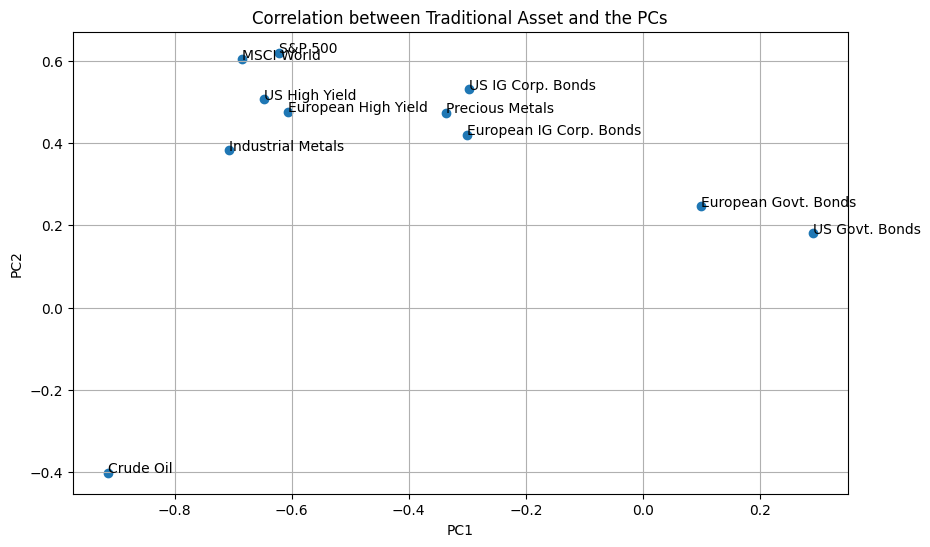

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(correlation_TAM_4w['PC1'], correlation_TAM_4w['PC2'])

for i, txt in enumerate(correlation_TAM_4w.index):
    plt.annotate(txt, (correlation_TAM_4w['PC1'].iloc[i], correlation_TAM_4w['PC2'].iloc[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation between Traditional Asset and the PCs')
plt.grid(True)
plt.show()

# Systematic Strategies

Do the same with the file Systematic Strategies Multi-asset PCA CHANGES=4w.csv

In [156]:
# Load the data
SSAM_4w = pd.read_csv('Copie de Systematic Strategies_Multi-asset PCA_CHANGES=4w.csv',index_col=0)
SSAM_4w.fillna(0, inplace=True)
# Perform PCA
pca_SSAM = PCA(n_components=2)
pca_SSAM.fit(SSAM_4w)


PCA(n_components=2)

Compute the correlation of each assets with PC1 and PC2

In [164]:
# Compute the correlation of each asset with PC1 and PC2
returns = pd.DataFrame(pca_SSAM.transform(SSAM_4w), columns=[f'PC{i+1}' for i in range(pca_SSAM.n_components_)])
SSAM_4w = SSAM_4w.reset_index(drop=True)
returns = returns.reset_index(drop=True)
concat = pd.concat([SSAM_4w,returns],axis=1)
focus_cols = ['PC1', 'PC2']

correlation_SSAM_4w= concat.corr().filter(focus_cols).drop(focus_cols)

Display the DataFrame:<br>
– Index: Traditional Asset <br>
– Column: PC1 and PC2<br>
– Contains: the correlation between Traditional Asset and the PCs<br>

In [166]:
print("Correlation between Systematic Strategies Multi Asset and the PCs:\n")
correlation_SSAM_4w.style.format(formatter='{:+.4f}').applymap(func=format_colour)

Correlation between Systematic Strategies Multi Asset and the PCs:



,PC1,PC2
Global Quality Income vs. Index,+0.1367,+0.8640
Global Equity Machine Learning,-0.0915,+0.0269
European Value vs. Index,-0.2709,-0.6414
Commodity Congestion,+0.2609,-0.1049
Multi-asset Trend,+0.1243,+0.4915
Repo Carry,+0.3278,-0.2163
Long Rates Vol.,+0.0664,+0.2365
Tail Hedge -SDV,+1.0000,-0.0001
Tail Hedge - SCV,+0.5078,-0.1281
Tail Hedge - Dynamic Put Ratio,+0.6440,+0.3117


Make a scatter plot of the previous DataFrame displaying also the name of the points

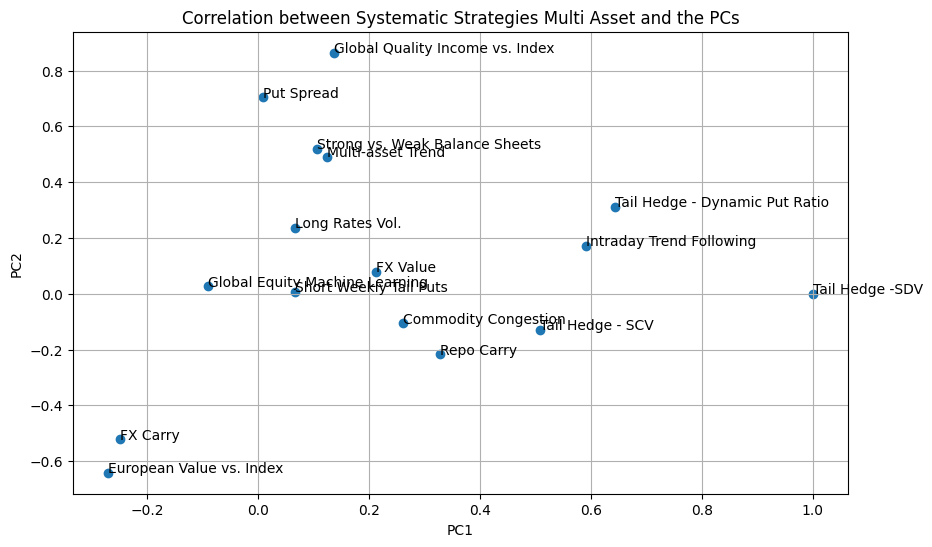

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(correlation_SSAM_4w['PC1'], correlation_SSAM_4w['PC2'])

for i, txt in enumerate(correlation_SSAM_4w.index):
    plt.annotate(txt, (correlation_SSAM_4w['PC1'].iloc[i], correlation_SSAM_4w['PC2'].iloc[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlation between Systematic Strategies Multi Asset and the PCs')
plt.grid(True)
plt.show()